# Unshuffle a sequence of frames 

This notebook is intended to xx. 

1. Preperation of the data for analysis
2. Analysis code 
3. Testing and validation


## Get data

In [361]:
from PIL import Image, ImageSequence

# Implement similar to below:
# https://stackoverflow.com/questions/753190/programmatically-generate-video-or-animated-gif-in-python
# image credit: https://www.pinterest.com.au/amp/pin/crash-bandicoot-gif--325385141804483015/

with Image.open("./data/crash_bandicoot/crash_bandicoot.gif") as gif:
    index = 1
    for frame in ImageSequence.Iterator(gif):
        frame.save(f"frame_{index}.png")
        index += 1

## Load and display sequences 
This is meant to prepare the data for the analysis. This includes loading in the movie, shuffling and then displaying them. 



In [423]:
import numpy as np
import os

def load_image(filename, greyscale = True):
    """Load an image and save it as an array."""
    if greyscale:
        img = Image.open(filename).convert("L")
    else:
        img = Image.open(filename).convert("RGB")
    return np.array(img)

def load_sequence(folder):
    """Load a sequence of frames."""
    output = {}
    for f in os.listdir(folder):
        if f.endswith(".png"):
            output[int(f[6:-4])] = load_image(os.path.join(folder,f))
    return output

def shuffle(sequence, seed_value=42):
    """Randomly shuffle a sequence of numbers."""
    np.random.seed(seed_value)
    return np.random.permutation(sequence)

def load_sequence_and_shuffle(folder, hold_frame1 = True):
    """Load a sequence of frames and shuffle their order."""
    # Need to have an error for number of frames mismatch
    output = {}
    seq = load_sequence(folder)
    n = len(seq)
    iseq = list(range(1,n+1))
    
    if hold_frame1:
        print("Now shuffling all frames, except for frame 1.")
        new_iseq = shuffle(range(2,n+1))
        new_iseq = [1,*new_iseq]
    else:
        print("Now shuffling all frames.")
        new_iseq = shuffle(iseq)
    print(f"Frame index -> New frame index") 
    for i, k in zip(iseq, new_iseq):
        print(f"{i} -> {k}")
        output[i] = seq[k]
    return output
    
# Load the data:
data_folder = "./data/crash_bandicoot/"
sequence = load_sequence(data_folder)
shuffled_sequence = load_sequence_and_shuffle(data_folder)
# Make a copy of the gif in case it is overwritten

Now shuffling all frames, except for frame 1.
Frame index -> New frame index
1 -> 1
2 -> 10
3 -> 3
4 -> 7
5 -> 2
6 -> 9
7 -> 4
8 -> 11
9 -> 6
10 -> 5
11 -> 8


<Figure size 432x288 with 0 Axes>

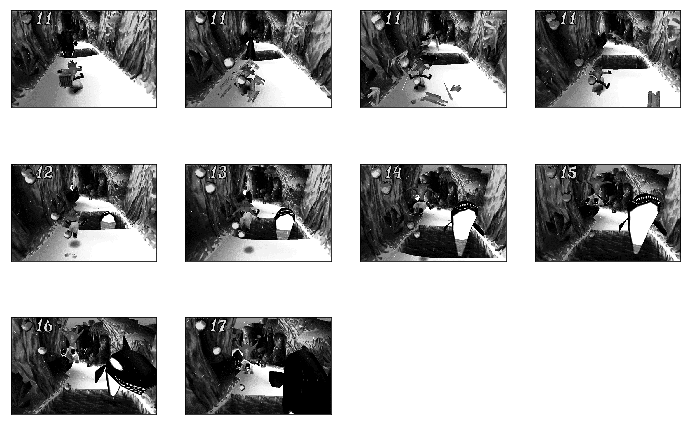

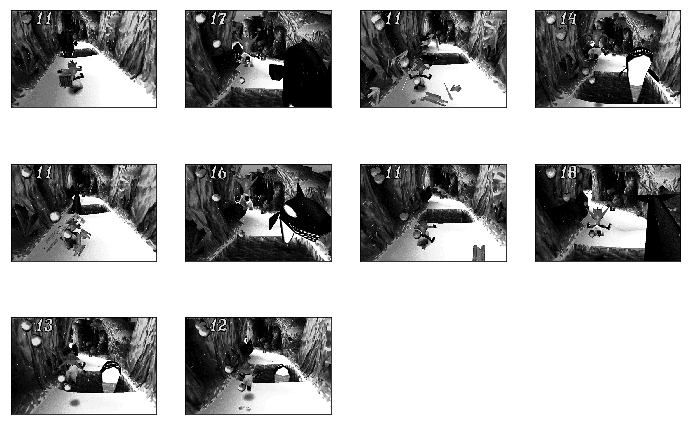

In [402]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
- Add titles to the figures and then labels to each frame in the sequence
- Save figures in the figs folder 

"""

def plot_sequence(sequence):
    """Display sequence as a grid."""
    fig = plt.figure(figsize=(12,8))
    for i in range(1, len(sequence)):
        ax = fig.add_subplot(3, 4, i)
        ax.imshow(sequence[i], cmap = plt.cm.gray)
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

def play_sequence(sequence):
    """Display sequence as a movie"""
    return None

plt.figure(1)
plot_sequence(sequence)

plt.figure(2)
plot_sequence(shuffled_sequence)



**Figure:** An example that has been shuffled for this analysis. 

## Calculating similarity between two rgb images
An interesting question is how do we compare two images when their content is uknown. Naturally, my first thought is to check for changes in the pixel values.  Assuming all of the images in the sequence are well-aligned, the same size, and shape.
To speed up the analysis, we start by unraveling all of teh images. 
Another way is to sum the value of all of the pixels and then unraveling. 


In [348]:
import scipy.spatial.distance as dist 

def euclidean(arr1, arr2):
    return dist.euclidean(arr1, arr2)

def sqeuclidean(arr1, arr2):
    return dist.sqeuclidean(arr1, arr2)

def correlation(arr1, arr2):
    return dist.correlation(arr1, arr2)

def cosine(arr1, arr2):
    return dist.cosine(arr1, arr2)

similarity_functions = [euclidean, sqeuclidean, correlation, cosine]

(10,)
Calculating the similarity between frame: 1 and frame: 2
Calculating the similarity between frame: 1 and frame: 3
Calculating the similarity between frame: 1 and frame: 4
Calculating the similarity between frame: 1 and frame: 5
Calculating the similarity between frame: 1 and frame: 6
Calculating the similarity between frame: 1 and frame: 7
Calculating the similarity between frame: 1 and frame: 8
Calculating the similarity between frame: 1 and frame: 9
Calculating the similarity between frame: 1 and frame: 10
Calculating the similarity between frame: 1 and frame: 11
Calculating the similarity between frame: 1 and frame: 12
Calculating the similarity between frame: 1 and frame: 13
Calculating the similarity between frame: 1 and frame: 14
Calculating the similarity between frame: 1 and frame: 15
Calculating the similarity between frame: 1 and frame: 16
Calculating the similarity between frame: 1 and frame: 17
Calculating the similarity between frame: 1 and frame: 18
Calculating the 

In [417]:
import itertools

n = len(sequence)
dict_sim_scores = {}
iseq = list(range(1,n+1))
#combinations = list(itertools.combinations(iseq, 2)) # unique combinations
combinations = list(itertools.permutations(iseq, 2)) # all possible combinations

f, ax = plt.subplots(1,3,figsize=(7,5))
for s in similarity_functions:
    for i in combinations:
        reference_image = sequence[i[0]]
        test_image = sequence[i[1]]
        dict_sim_scores[i] = euclidean(reference_image.flatten(), test_image.flatten())


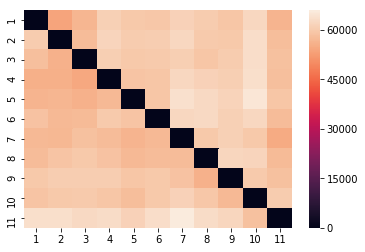

In [418]:
import pandas as pd
import seaborn as sb   

ser = pd.Series(list(dict_sim_scores.values()),
                  index=pd.MultiIndex.from_tuples(dict_sim_scores.keys()))

df = ser.unstack().fillna(0)
sb.heatmap(df)


In [336]:
def most_similar_frame(values):
    return min(values, key=values.get)



iseq = []
for i in range(1,len(shuffled_sequence)):
    print(i)
    iseq.append(most_similar_frame(similarity_metric[i]))
    #k = most_similar_frame(similarity_metric[i])
    #my_sequence[i] = shuffled_sequence[k]
iseq


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28


ValueError: min() arg is an empty sequence

## Validation

sequence_index = {}
sequence_index["reference"] = range(1,len(sequence))
seque

## Optimization
1. Split foreground from background